___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Yelp Reviews Natural Language Processing Project

In this NLP project I attempt to classify Yelp Reviews into 1 or 5 star categories based on the text content in the reviews. 

The dataset is provided in csv format with 10 000 entries.  The complete dataset can be downloaded from Kaggle: [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).  Each observation in this dataset is a review of a particular business by a particular user.

In this project I use the following libraries and toolkits: Scikit-learn, Natural Language Toolkit, Seaborn, Matplotlib and  Pandas.

#### Some interesting analyses and interpretations from visualizations in this project:  

* It has been found that most users rate a business with a 4 or 5 star.
* We see a tendency of users who rate with a 4 or 5 star to write shorter reviews than those who rate with a 2 or 3 star.  We see this in all the quartiles and the means of the length of texts vs the star rating.
* As the number of 'useful' clicks on a review increase, the number of 'cool' or 'funny' clicks on the review also tends to be more.
* A Multinomial Naive Bayes model is fit to the data which makes good predictions on the star ratings based on the text content 
* of the review.


#### Column descriptions:
(columns that will be used)

* stars:  The number of stars (1 through 5) or rating assigned by the reviewer to the business.
* text:  The text from the review.
* cool:  The number of "cool" votes a specific review received from other Yelp users, i.e. a rating of the review itself
* useful:  The number of "useful" votes a specific review received from other Yelp users, i.e. a rating of the review itself
* funny:  The number of "funny" votes a specific review received from other Yelp users, i.e. a rating of the review itself


## Viewing the Data

In [58]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
yelp = pd.read_csv('yelp.csv')

In [60]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [61]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [62]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [63]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [94]:
yelp['cool'].unique()

array([ 2,  0,  1,  4,  7,  3,  5, 11,  6,  8, 16, 28, 12, 13, 10, 22, 17,
       18,  9, 14, 21, 15, 19, 20, 23, 77, 27, 38, 32], dtype=int64)

In [93]:
yelp['funny'].unique()

array([ 0,  1,  4,  2,  3,  8,  9,  6,  5, 39,  7, 12, 16, 20, 27, 11, 13,
       17, 10, 30, 22, 14, 19, 18, 23, 21, 15, 24, 57], dtype=int64)

## Exploratory Data Analysis

**Use FacetGrid to create 5 histograms on text length based on the star ratings.**

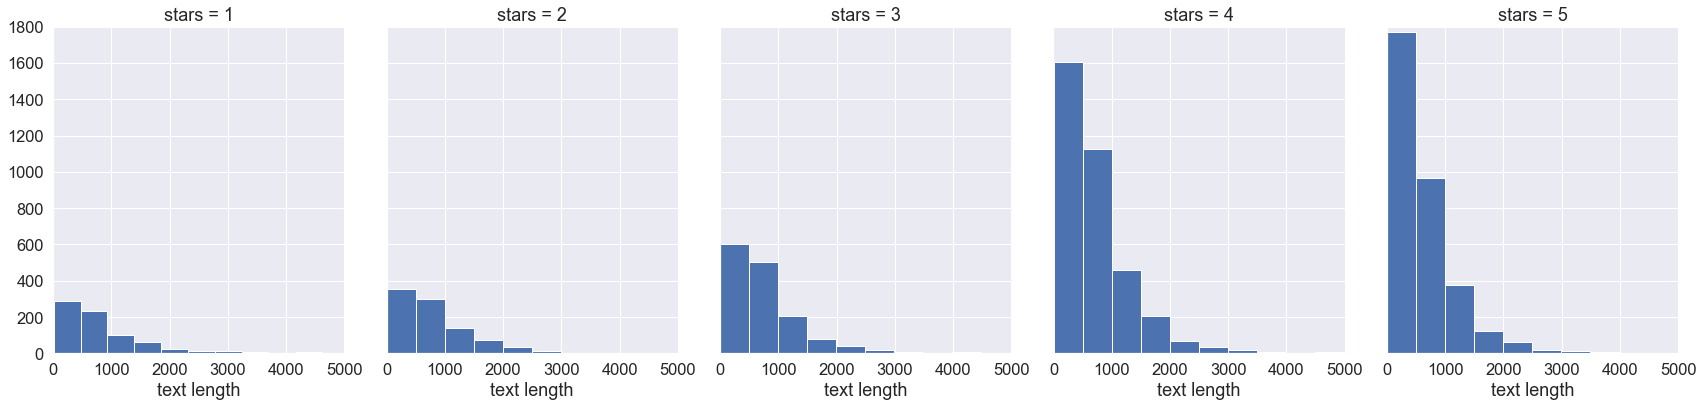

In [77]:
sns.set(font_scale = 1.5)
g = sns.FacetGrid(data=yelp, col= 'stars', height = 6, aspect = 0.8)
g.map(plt.hist, 'text length', bins = 10)
g.set(xlim = (0,5000))
g.set(ylim = (0,1800))
plt.tight_layout()
plt.show();

In [ ]:
# We can see that the vast amount of users were satisfied with the services from the businesses they rated since they gave 
# 4 or 5 star ratings.
# Most users that gave a 4 or 5 star rating gave reviews of between 0-1000 words.
# Approximately 2100 users that rated businesses with a 4 or 5 star wrote review of 500-1000 words.  Approximately 1000 users 
# that gave a rating of 1, 2 or 3 stars wrote review of 500-1000 words.
# Approximately 1800 users that gave a 5 star rating for a business wrote reviews of between 0-500 words, about 1000 users
# wrote reviews of 500-1000 words etc.

**Create a boxplot of text length for each star category.**

In [82]:
import matplotlib.ticker as ticker
import seaborn.apionly as sns

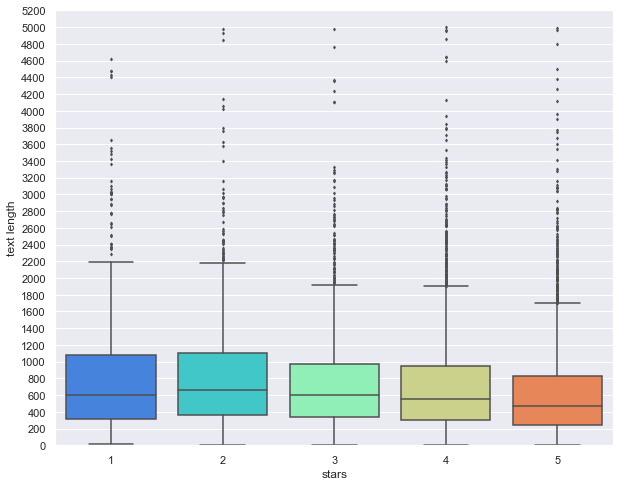

In [87]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
sns.set(rc = {'figure.figsize':(10,8)})
f= sns.boxplot(data= yelp, x='stars', y='text length', palette = 'rainbow', fliersize = 2)
f.set(ylim = (0,5200))

f.yaxis.set_major_locator(ticker.MultipleLocator(200))
f.yaxis.set_major_formatter(ticker.ScalarFormatter())

In [ ]:
# From the boxplots for the different star ratings we see that the median number of words used for reviews does not vary much
# between the different ratings.  The median number of words for a rating of 1 is about 600 and for a rating of 5 about 480, for
# a rating of 4 the median number of words is about 570.

# Overall we see the 25th, median and 75th percentiles decreasing from a rating of 2 to a rating of 5, i.e. as the ratings
# increase users write less words in general, which is interesting.

# There seems to be many more outlier number of words used at the ratings 4 and 5.  This is probably users that explained their 
# experience with much detail.

**Create a countplot of the number of occurrences for each type of star rating.**

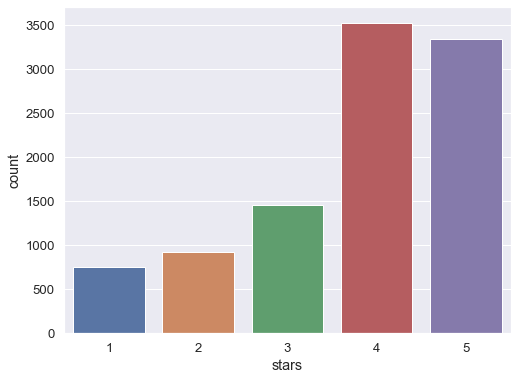

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data= yelp, x= 'stars');

In [ ]:
# There are about 3800 users that gave ratings of 4 or 5, 1650 users that gave a rating of 1650 and 1450 users that gave a
# rating of 1450.

**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [10]:
# finding means of dataframe -- will return only means of numeric cols.

means = yelp.groupby('stars').mean()
means

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [95]:
# For a rating of 2 the mean number of words used is 842, for a rating of 3 it is 785, for a rating of 4 the mean is 712 and for
# a rating of 5 the mean number of words is 624.

# We saw that the 25th, 75th and 50th (median) percentiles decreased as the star ratings increased from 2 to 5.  With the mean 
# number of words used in reviews we see the same trend.

# The average number of 'useful' clicks on a users review, who rated a business with a 1 star, is 1.6 clicks. 
# The average number of 'useful' clicks on a users review, who rated a business with a 5 star, is 1.38 click.

**Use the corr() method on that groupby dataframe to produce this dataframe**

In [96]:
corr_df = means.corr()
corr_df

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


In [97]:
yelp[['text length', 'useful']].corr()

,text length,useful
text length,1.000000,0.293975
useful,0.293975,1.000000


In [179]:
yelp[['text length', 'funny']].corr()

,text length,funny
text length,1.00000,0.25176
funny,0.25176,1.00000


In [177]:
yelp[['useful', 'cool']].corr()

,useful,cool
useful,1.000000,0.887102
cool,0.887102,1.000000


In [176]:
yelp[['useful', 'funny']].corr()

,useful,funny
useful,1.000000,0.723406
funny,0.723406,1.000000


In [178]:
# The correlations are interpreted below the heatmap.

**Create a heatmap based off the .corr() dataframe:**

<AxesSubplot:>

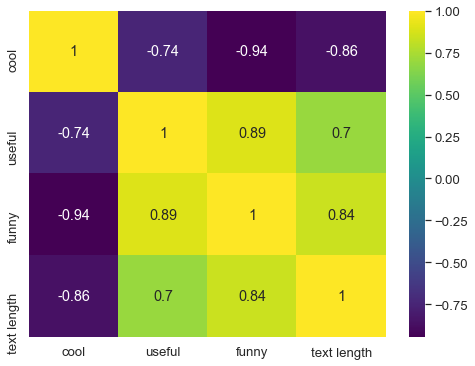

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_df, cmap = 'viridis', annot = True)

In [98]:
# There is a very strong positive correlation between the average number of 'funny' clicks on a user review and the average 
# length of a text message, but a very weak correlation between the 2 variables when all the data is used to find the correlation.
# There is also a very strong positive correlation between the average number of 'funny' clicks and the average number of 'useful'
# clicks.  The correlation between all the data of these 2 variables is strong.

# There is a very strong negative correlation between the average number of 'cool' clicks on a users review and the average
# length of a text message.  Users might tend to click 'cool' if a review is shorter, if we consider only the mean values at this 
# point.

# There is a fairly strong positive correlation between the number of 'useful' clicks on a users review and the average number 
# of words in a review.
# Doing further analysis we see that there is a very weak positive correlation between the length of a review and whether someone
# clicks 'useful' on the users review.

# There is a very strong positive correlation between the 2 variables 'useful' and 'cool' and a strong correlation between the
# 2 variables 'useful' and 'funny'.  This suggests that other Yelp users reviewing the reviews would likely click 'cool' or 'funny'
# if a review has been rated 'useful' before.  Users probably seek out reviews that was found useful before to help them in their
# decision making. 

## NLP Classification

To make things a little easier, we will grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains only the 1 or 5 star reviews.**

In [157]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

**Create two objects X and y where X is the 'text' column of yelp_class and y the 'stars' column of yelp_class. (The features and target/labels)**

In [158]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [159]:
from sklearn.feature_extraction.text import CountVectorizer

**Use the fit_transform method on the CountVectorizer object and pass in X and also overwrite X.**

In [160]:
vectorizer = CountVectorizer()

In [161]:
X = vectorizer.fit_transform(raw_documents = X)

## Train Test Split

We will now split the data into a training and testing set.

**Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101.**

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 101)

## Training a Model

**Import MultinomialNB, create an instance of the estimator and call it nb.**

In [164]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fit nb using the training data.**

In [165]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

We will now make predictions from the training data and evaluate how well our model performed.

**Use the predict method off of nb to predict labels from X_test.**

In [166]:
predictions = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test.**

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
print(confusion_matrix(y_test, predictions))

[[159  69]
 [ 22 976]]


In [169]:
# 159 of the 228 reviews in the test set is correctly predicted to have a star rating of 1.  That is 70% predictions that are
# correct.
# 976 of the 998 reviews in the test set is correctly predicted to have a star rating of 5.  That is 97.8% predictions that are
# correct.

In [170]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [171]:
# The weighted average ratio of true 1 or 5 star ratings (predicting the ratings correctly) to all the 1 or 5 star ratings
# is 92% 
# The weighted average measure of our model to correctly identify true 1 or 5 star ratings is 93%
# The weighted average accuracy of our model to predict true 1 or 5 star ratings is 92%

# The ratio of true 5 star ratings (predicting the ratings correctly) to all the 5 star ratings is 93% 
# The measure of our model to correctly identify true 5 star ratings is 98%
# The accuracy of our model to predict true 5 star ratings is 96%

# Overall this is a very good model to predict the 5 star ratings of users based on their reviews.  It is a reasonably good model
# for predicting 1 star ratings.

**Let's see what happens if we try to include TF-IDF to the process using a pipeline.**

## Using Text Processing

**Import TfidfTransformer from sklearn.**

In [135]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn.**

In [136]:
from sklearn.pipeline import Pipeline

**Create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [137]:
pipeline = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

## Using the Pipeline

**We need to re-split the original data.  We need only the text for the X variable (not vectorized).**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [138]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =101)

**Fit the pipeline to the training data.**

In [139]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer = 'word')),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
                    ])

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [140]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

In [141]:
print(confusion_matrix(y_test, preds))

[[  0 228]
 [  0 998]]


In [142]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Frequency inverse document frequency did not help to improve our model.  It yielded a strange results.  No predictions were 
# made for the 1 star rating.
# When we leave out Tf-idf from the pipeline, we find that the Countvectorizer and Multinomial Naive Bayes steps in the pipeline
# does not improve the model, the results stay more or less the same.

## Conclusion:

#### We will thus use the Multinomial Naive Bayes model that we built before using the pipeline.
#### Overall this is a very good model to predict the 5 star ratings of users based on their reviews.  It is a reasonably good model for predicting 1 star ratings.